In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data

In [132]:
import re

# Define the regular expression pattern that matches the separator between values
pattern = r'\s+'

In [133]:
df = pd.read_csv("Vertebral_column_3C.dat", header=None, names=['pelvic incidence','pelvic tilt',
           ' lumbar lordosis angle',' sacral slope',
           'pelvic radius', ' grade of spondylolisthesis', 
           'Class label'], sep=pattern)

In [134]:
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class label
0,63.03,22.55,39.61,40.48,98.67,-0.25,DH
1,39.06,10.06,25.02,29.00,114.41,4.56,DH
2,68.83,22.22,50.09,46.61,105.99,-3.53,DH
3,69.30,24.65,44.31,44.64,101.87,11.21,DH
4,49.71,9.65,28.32,40.06,108.17,7.92,DH


In [135]:
y=df['Class label']

In [136]:
y.tail

<bound method NDFrame.tail of 0      DH
1      DH
2      DH
3      DH
4      DH
       ..
305    NO
306    NO
307    NO
308    NO
309    NO
Name: Class label, Length: 310, dtype: object>

In [137]:
x = df.drop(df.columns[6], axis=1)

In [138]:
x.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


In [139]:
mapping = {'DH': 0, 'SL': 1, 'NO': 2}

# Use the map method to replace the original class labels with the desired labels
y_new=y.map(mapping)

In [140]:
#The np.unique(y) function returned the three unique class labels
print('Class label:', np.unique(y))

Class label: ['DH' 'NO' 'SL']


1-Dividing into training and testing

In [141]:
#a) Two features
x_two_features=df[['pelvic incidence', 'pelvic radius']]

In [142]:
x_two_features.head()

,pelvic incidence,pelvic radius
0,63.03,98.67
1,39.06,114.41
2,68.83,105.99
3,69.30,101.87
4,49.71,108.17


In [143]:
#split data into a training set (70%) and a testing set (30%)
#Using such a fixed random_state ensures that our results are reproducible.
#Stratifying to ensure that the division is done in same proportions
from sklearn.model_selection import train_test_split

X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    x_two_features, y_new, test_size=0.3, random_state=1,stratify=y_new)

In [144]:
print('Labels counts in y:', np.bincount(y_new))
print('Labels counts in y_two_train:', np.bincount(y_two_train))
print('Labels counts in y_two_test:', np.bincount(y_two_test))

Labels counts in y: [ 60 150 100]
Labels counts in y_two_train: [ 42 105  70]
Labels counts in y_two_test: [18 45 30]


In [145]:
#standardize features
#Using the fit method, StandardScaler estimated the parameters, 𝜇 (sample mean) 
#and 𝜎 (standard deviation), for each feature dimension from the training data. 
#By calling the transform method, we then standardized
#the training data using those estimated parameters, 𝜇 and 𝜎 .
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_two_train)
X_two_train_std = sc.transform(X_two_train)
X_two_test_std = sc.transform(X_two_test)

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTC= DecisionTreeClassifier()
DTC.fit(X_two_train_std, y_two_train)
y_two_pred = DTC.predict(X_two_test_std)
print('Misclassified examples: %d' % (y_two_test != y_two_pred).sum())

#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_two_test, y_two_pred))

Misclassified examples: 35
Accuracy: 0.624


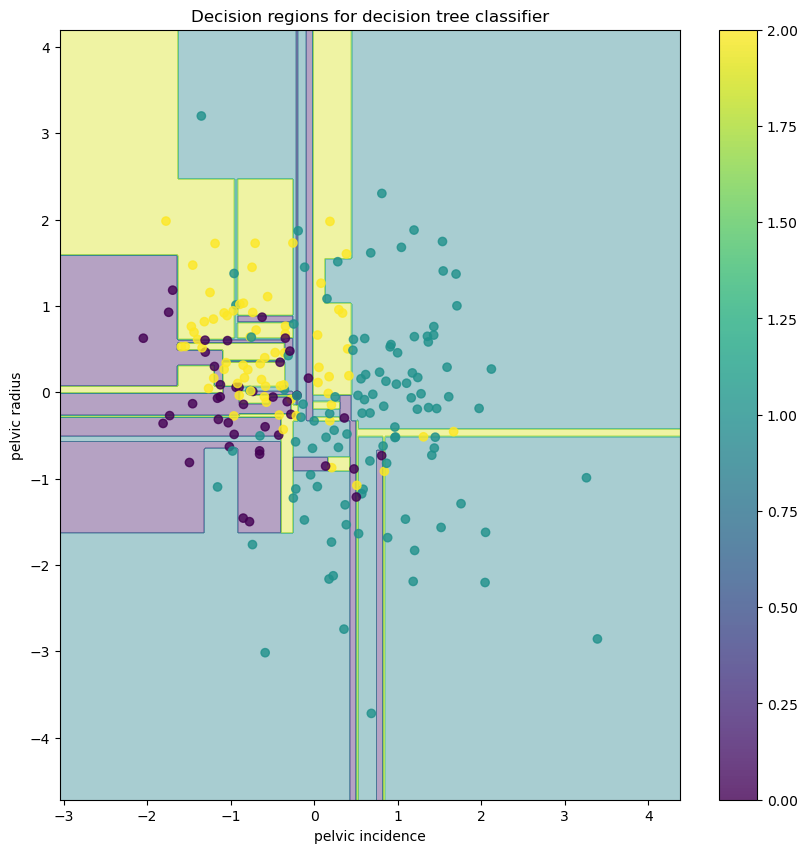

In [147]:
# Plot decision regions
plot_step = 0.02
feature_names = ['pelvic incidence', 'pelvic radius']
target_names = ['DH', 'NO', 'SL']

x_min, x_max = X_two_train_std[:, 0].min() - 1, X_two_train_std[:, 0].max() + 1
y_min, y_max = X_two_train_std[:, 1].min() - 1, X_two_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
Z = DTC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_two_train_std[:, 0], X_two_train_std[:, 1], c=y_two_train, alpha=0.8)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Decision regions for decision tree classifier')
plt.colorbar()
plt.show()

In [148]:
#b) All the features
X_train, X_test, y_train, y_test = train_test_split(
    x, y_new, test_size=0.3, random_state=1,stratify=y_new)

In [149]:
print('Labels counts in y:', np.bincount(y_new))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 60 150 100]
Labels counts in y_train: [ 42 105  70]
Labels counts in y_test: [18 45 30]


In [150]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [151]:
DTC.fit(X_train_std, y_train)
y_pred = DTC.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 17
Accuracy: 0.817


2- Dividing into 30% training and 30% testing

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y_new, test_size=0.3,train_size=0.3, random_state=1,stratify=y_new)

In [153]:
print('Labels counts in y:', np.bincount(y_new))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [ 60 150 100]
Labels counts in y_train: [18 45 30]
Labels counts in y_test: [18 45 30]


In [154]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [155]:
#10-fold CV for SVM
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import svm

param_grid= {'C': [0.1, 1, 10, 100], 'kernel':['linear','rbf','poly','sigmoid']}

cv=KFold(n_splits=10)
grid_search=GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid_search.fit(X_train_std,y_train)

print('Best score', grid_search.best_score_)
print('Best Hyperparameter', grid_search.best_params_)

Best score 0.828888888888889
Best Hyperparameter {'C': 1, 'kernel': 'linear'}


In [156]:
from sklearn.svm import SVC

# linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_std, y_train)
y_pred1=svm_linear.predict(X_test_std)
print('Linear Kernel Misclassified examples: %d' % (y_test != y_pred1).sum())

Linear Kernel Misclassified examples: 17


In [157]:
#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))

Accuracy: 0.817


In [158]:
#b)10-Fold CV for decision tree
param_grid1 = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10]
}

#10-fold CV
cv1 = KFold(n_splits=10)
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid1,
    cv=cv1
)
grid_search.fit(X_train_std, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 3}
Best score: 0.8277777777777777


In [159]:
DTC1= DecisionTreeClassifier(max_depth=3)
DTC1.fit(X_train_std, y_train)
y_pred2 = DTC1.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred2).sum())

#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))

Misclassified examples: 16
Accuracy: 0.828


3-Logistic Regression and Decision Tree, Sensitiviy, Specificity, Confusion Matrix, ROC and AUC

In [160]:
y_logit = y.replace(['DH', 'SL'], 'Abnormal')

In [161]:
y_logit.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: Class label, dtype: object

In [162]:
y_logit.tail()

305    NO
306    NO
307    NO
308    NO
309    NO
Name: Class label, dtype: object

In [163]:
mapping = {'Abnormal': 0, 'NO': 1}

# Use the map method to replace the original class labels with the desired labels
y_new1=y_logit.map(mapping)

In [164]:
y_new1.head()

0    0
1    0
2    0
3    0
4    0
Name: Class label, dtype: int64

In [165]:
y_new1.tail()

305    1
306    1
307    1
308    1
309    1
Name: Class label, dtype: int64

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y_new1, test_size=0.3,train_size=0.3, random_state=1,stratify=y_new1)

In [167]:
print('Labels counts in y:', np.bincount(y_new1))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [210 100]
Labels counts in y_train: [63 30]
Labels counts in y_test: [63 30]


In [168]:
#10-fold cv Logistic Regression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

cv2 = KFold(n_splits=10, shuffle=True, random_state=42)

#l2-regularization
LR = LogisticRegressionCV(Cs=10, cv=cv2, penalty='l2', solver='liblinear', random_state=42)
LR.fit(X_train_std, y_train)

print('Optimal regularization parameter:', LR.C_[0])

Optimal regularization parameter: 0.3593813663804626


In [169]:
LR_=LogisticRegression(C=LR.C_[0], penalty='l2', solver='liblinear', random_state=42)
LR_.fit(X_train_std, y_train)
y_pred3 = LR_.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred3).sum())

#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred3))

Misclassified examples: 31
Accuracy: 0.667


In [170]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()

# Display the confusion matrix, Specificity and Sensitivity
print("Confusion matrix:")
print(cm)


Confusion matrix:
[[57  6]
 [25  5]]


In [171]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()

print(f"TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}")

TN = 57, FP = 6, FN = 25, TP = 5


In [172]:
LR_Specificity=(tn)/(fp+tn)
LR_Sensitivity=(tp)/(tp+fn)
print("Specificity: {:.2f}".format(LR_Specificity))
print("Sensitivity: {:.2f}".format(LR_Sensitivity))

Specificity: 0.90
Sensitivity: 0.17


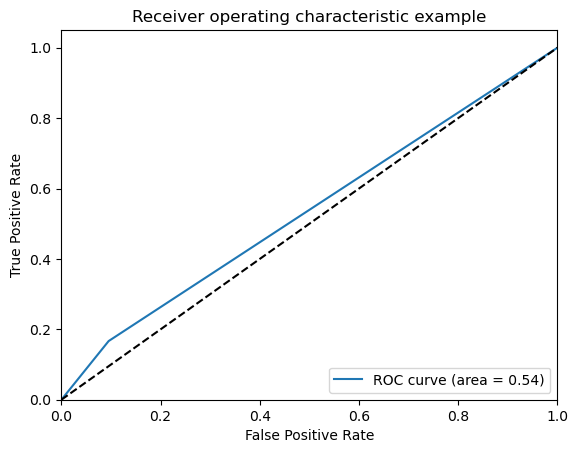

In [173]:
#ROC and AUC
from sklearn.metrics import roc_curve, auc

# y_true contains the true labels, y_score contains the predicted scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # plot the random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [174]:
#b)10-Fold CV for decision tree
param_grid2 = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10]
}

#10-fold CV
cv3 = KFold(n_splits=10)
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid2,
    cv=cv3
)
grid_search.fit(X_train_std, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 3}
Best score: 0.6688888888888889


In [175]:
DTC2= DecisionTreeClassifier(max_depth=3)
DTC2.fit(X_train_std, y_train)
y_pred4 = DTC2.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred4).sum())

#Accuracy Score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred4))

Misclassified examples: 34
Accuracy: 0.634


In [176]:
# Create a confusion matrix and calculate Specificity and Sensitivity metrics
cm1 = confusion_matrix(y_test, y_pred4)
accuracy = (cm1[0,0] + cm1[1,1]) / cm1.sum()

# Display the confusion matrix, Specificity and Sensitivity
print("Confusion matrix:")
print(cm1)

Confusion matrix:
[[48 15]
 [19 11]]


In [177]:
tn, fp ,fn, tp = confusion_matrix(y_test, y_pred4).ravel()

print(f"TN = {tn}, FP = {fp}, FN = {fn}, TP = {tp}")

TN = 48, FP = 15, FN = 19, TP = 11


In [179]:
DTC2_Recall=(tp)/(tp+fn)
DTC2_Precision=(tp)/(tp+fp)
print("Recall: {:.2f}".format(DTC2_Recall))
print("Precision: {:.2f}".format(DTC2_Precision))

Recall: 0.37
Precision: 0.42


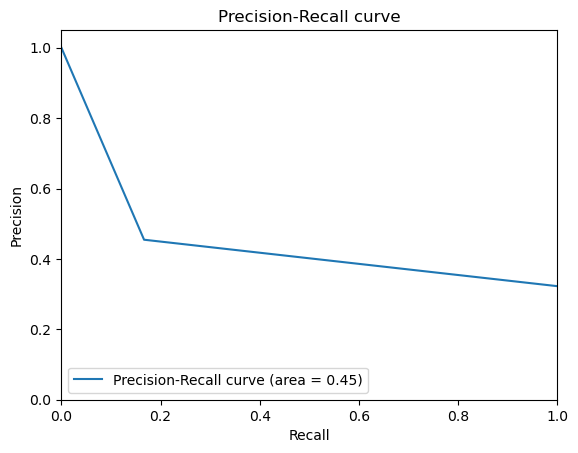

In [180]:
#ROC and AUC
from sklearn.metrics import precision_recall_curve, auc

# y_true contains the true labels, y_score contains the predicted scores
precision, recall, thresholds = precision_recall_curve(y_test, y_pred3)

# Compute the area under the precision-recall curve (AUC)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
import matplotlib.pyplot as plt
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()